# Лабораторная работа 4. Логические методы классификации

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

data_source = 'datasets/Raisin/Raisin_Dataset.data'
d = pd.read_table(data_source, delimiter=';', 
                  header=None, 
                  names=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                         'Eccentricity', 'ConvexArea', 'Extent', 'answer'])
dX = d.iloc[:,0:3]
dy = d['answer']
print(dX.head())
print(dy.head())

    Area   Perimeter  MajorAxisLength
0  87524  442.246011       253.291155
1  75166  406.690687       243.032436
2  90856  442.267048       266.328318
3  45928  286.540559       208.760042
4  79408  352.190770       290.827533
0    Kecimen
1    Kecimen
2    Kecimen
3    Kecimen
4    Kecimen
Name: answer, dtype: object


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = \
train_test_split(dX, dy, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5, 
                              random_state=21, 
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.8333333333333334


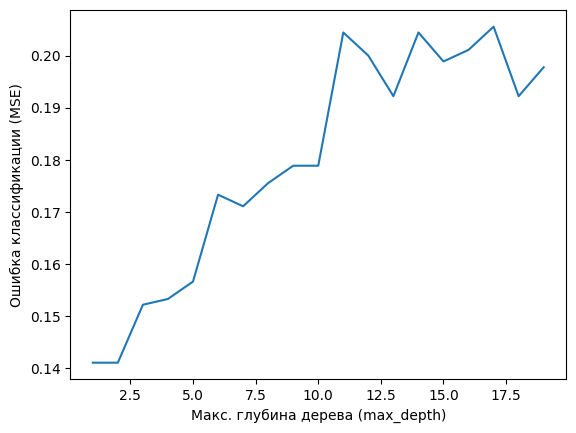

Оптимальные значения max_depth:  [1, 2]


In [3]:
from sklearn.model_selection import cross_val_score

# Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d, 
                                  random_state=21, 
                                  max_features=2)
    scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

In [4]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=2, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(dX, dy)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

# Генерируем графическое представление дерева
tree.export_graphviz(tree_grid.best_estimator_, 
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file='raisin_tree.dot',  
                     filled=True, rounded=True)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 1, 'max_features': 2}
Лучшие баллы cross validation:  0.8588888888888888


In [5]:
# Построим модель для оптимального дерева
# max_features = 2, max_depth = 1

dtc = DecisionTreeClassifier(max_depth=1, 
                             random_state=21, 
                             max_features=2)
dtc.fit(dX, dy)
res = dtc.predict([[53233, 503.0, 400.0]])
print(res) 

['Besni']


c:\Users\nrg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


C:\Users\nrg\AppData\Local\Temp\ipykernel_19276\1033308698.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
C:\Users\nrg\AppData\Local\Temp\ipykernel_19276\1033308698.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
c:\Users\nrg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\nrg\AppData\Local\Temp\ipykernel_19276\1033308698.py:17: FutureWarning: Se

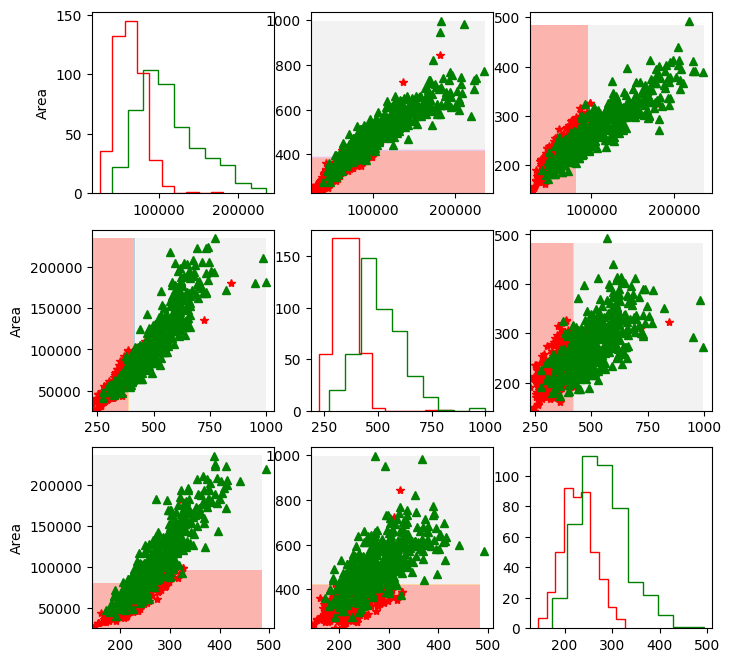

In [6]:
plot_markers = ['r*', 'g^']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(3, 3, figsize=(8,8))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 10 

# Обходим все subplot
for i in range(0,3):
    for j in range(0,3):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
            model.fit(dX.iloc[:, [i,j]], dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            places[i,j].contourf(xx, yy, p.astype(float), cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j], 
                                  plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(dX.columns[j])
        
        if i==3:
            places[i, j].set_xlabel(dX.columns[i])
        
    
        